<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.856 · Análisis de sentimientos y redes sociales</p>
<p style="margin: 0; text-align:right;">Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Anàlisi de sentiments i xarxes socials
## PLA4: Representació de xarxes socials com a grafs

## Propietats bàsiques de les xarxes


En el capítol 2 del llibre *Análisis de datos de redes sociales*, *Introducción a la teoría de grafos*, hem presentat les propietats bàsiques dels grafs. En aquest notebook, farem una petita introducció a la manera de calcular-les sobre grafs de [networkx](https://networkx.github.io/). En la pròxima unitat, tractarem amb més detall les propietats dels grafs i veurem com detectar i analitzar les comunitats que hi apareixen.



## 1. Els graus dels nodes

Usarem com a exemple el graf de Google+ que hem descarregat al principi d'aquesta unitat:

In [1]:
# Importem la llibreria networkx.
import networkx as nx

# Obrim el fitxer descarregat.
with open("./data/soc-gplus.edges", 'rb') as gp_file:
    
    # Creem el graf
    g = nx.read_edgelist(gp_file, comments="%")

El grau és una de les mètriques més bàsiques dels nodes. El mètode  [`degree`](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html#networkx.Graph.degree) de la classe graf permet recuperar els graus dels nodes d'un graf.

In [2]:
# creem una llista amb els graus de tots els nodes del graf.
degrees = [d for _, d in g.degree()]

In [3]:
degrees

[1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 5,
 2,
 3,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 5,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 6,
 3,
 2,
 3,
 8,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 6,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 5,
 2,
 3,
 3,
 2,
 1,
 1,
 1,
 1,


In [3]:
import numpy as np

# Mostrem estadístics sobre els graus.
print('El grau màxim és: {}'.format(max(degrees)))
print('El grau mínim és: {}'.format(min(degrees)))
print('La mitjana dels graus del graf és: {}'.format(np.mean(degrees)))
print('La mitjana dels graus del graf és: {}'.format(np.median(degrees)))

El grau màxim és: 2761
El grau mínim és: 1
La mitjana dels graus del graf és: 3.3175893008295243
La mitjana dels graus del graf és: 1.0


La distribució dels graus de tots els nodes del graf ens ofereix informació sobre com és el graf. A partir de la llista de graus que hem creat, podem generar una gràfica que ens mostri aquesta distribució:

In [4]:
# Comptem quantes vegades apareix cada grau en el graf. 
from collections import Counter
degs_dict = Counter(degrees)
# Creem una llista amb els graus i una altra amb el nombre de vegades que apareixen.
data = list(zip(*[(d, degs_dict[d]) for d in sorted(degs_dict)]))

In [5]:
# Activem matplotlib i indiquem que es mostrin els plots en el mateix notebook
# usant un 'magic command' de jupyter.
%matplotlib inline

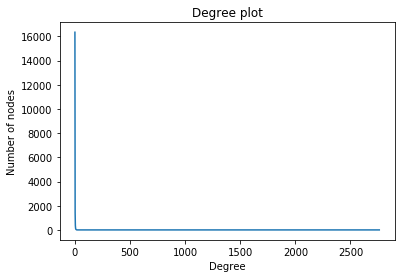

In [6]:
# Generem un plot amb la distribució de graus.
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(data[0], data[1])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree plot')
plt.show()

El plot que acabem de generar és poc informatiu: podem veure que la majoria de nodes tenen un grau molt baix, però és difícil apreciar quin és exactament aquest grau (0?, 1?, potser 2?) i no sabem quants nodes tenen graus més alts (quants nodes tenen grau superior a 500? N'hi ha algun?). Per a poder obtenir més informació, canviarem l'escala dels eixos, de lineal a logarítmica:

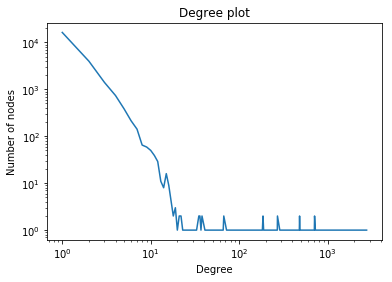

In [7]:
fig = plt.figure()
plt.plot(data[0], data[1])
# Especifiquem escala logarítmica en tots dos eixos.
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree plot')
plt.show()

## 2. Distàncies

Finalment, veurem com es poden obtenir mètriques bàsiques de distància usant un graf de mida més petita, el graf del [club de Karate de Zacarías](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). En la unitat següent, veurem altres conceptes més avançats d'anàlisi de grafs.

In [8]:
# Carreguem el graf.
g = nx.karate_club_graph()
# Mostrem el diàmetre, el radi i la mitjana dels camins més curts entre parells de nodes.
print("El diàmetre del graf és: {}".format(nx.diameter(g)))
print("El radi del graf és: {}".format(nx.radius(g)))
print("La mitjana dels camins més curts del graf és: {}".format(nx.average_shortest_path_length(g)))

El diàmetre del graf és: 5
El radi del graf és: 3
La mitjana dels camins més curts del graf és: 2.408199643493761


Networkx també disposa de funcions per a visualitzar grafs. La funció [`draw`](https://networkx.github.io/documentation/networkx-2.0/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw) genera una visualització simple del graf:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


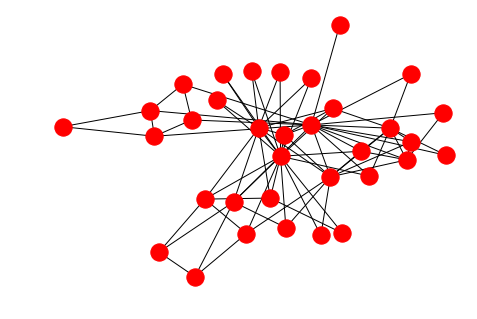

In [9]:
# Dibuixem els nodes i les arestes del graf
nx.draw(g)

Generem una visualització del graf anterior una mica més elaborada, que ressalti un dels camins més curts de longitud igual al radi del graf i un altre de longitud igual al diàmetre. Observeu que aquests camins no tenen perquè ser únics, és a dir, hi pot haver més d'un camí de longitud igual al diàmetre i més d'un camí de longitud igual al radi (però sempre hi haurà com a mínim un camí per a cada valor). A més, ara especificarem explícitament l'algorisme de layout que s'ha d'usar per a determinar les posicions dels nodes en el plànol.

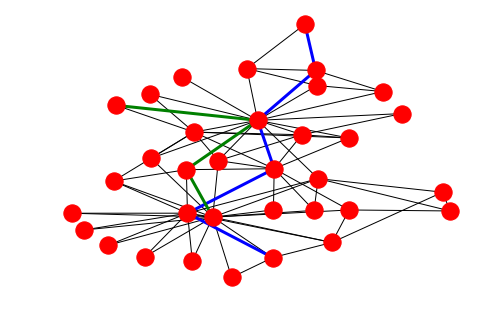

In [10]:
# Calculem la posició dels nodes i les arestes del graf usant l'algorisme kamada kawai.
pos = nx.kamada_kawai_layout(g)
# Dibuixem tots els nodes i les arestes del graf.
nx.draw(g, pos)

# Calculem el radi i el diàmetre del graf.
diameter = nx.diameter(g)
radius = nx.radius(g)

# Busquem algun camí més curt de longitud igual al radi i al diàmetre.
d_path, r_path = None, None
for sp in nx.all_pairs_shortest_path(g):
    origin = sp[0]
    for dest in sp[1]:
        if len(sp[1][dest]) == diameter + 1:
            d_path = sp[1][dest]
        if len(sp[1][dest]) == radius + 1:
            r_path = sp[1][dest]

# Creem les llistes d'arestes en cada camí.
edges_in_diam = [(d_path[i], d_path[i+1]) for i in range(len(d_path)-1)]   
edges_in_rad = [(r_path[i], r_path[i+1]) for i in range(len(r_path)-1)]   

# Repintar les arestes de les llistes de color blau (diàmetre) i verd (radi).
nx.draw_networkx_edges(g,pos=pos, edgelist=edges_in_diam, edge_color='b', width=3)
nx.draw_networkx_edges(g,pos=pos, edgelist=edges_in_rad, edge_color='g', width=3)